# Pathfinding Algorithm

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

The pathfinding algorithm is useful in order to get all vertices reachable from a given node, meaning that there exists a path connecting theme. The function below return the list of all reachable nodes in the graph, starting from a given node.

In [2]:
def pathfinding(G, start):
    #useful variables of the graph given in input
    node_list = list(G.nodes)
    edge_list = list(G.edges)

    #number of nodes
    n = len(node_list)
    #number of edges
    m = len(edge_list)

    #set of nodes to be processed
    Q = {start}
    #set of reachable nodes starting from the input node
    S = {start}

    #set predecessor for every node
    nx.set_node_attributes(G, 0, 'pred')
    G.nodes[start]['pred'] = start

    while Q:
        node = Q.pop()
        #for each neighbor not visited yet, update infos
        for neighbor in G.neighbors(node):
            if G.nodes[neighbor]['pred'] == 0:
                G.nodes[neighbor]['pred'] = node
                Q.add(neighbor)
                S.add(neighbor)

    return S

### Test

Testing the pathfinding algorithm with the following graph.

In [3]:
G = nx.Graph()
G.add_edge(1, 2, weight=14)
G.add_edge(1, 3, weight=2)
G.add_edge(1, 4, weight=1)
G.add_edge(2, 3, weight=15)
G.add_edge(2, 6, weight=7)
G.add_edge(3, 4, weight=6)
G.add_edge(3, 5, weight=5)
G.add_edge(3, 7, weight=12)
G.add_edge(4, 6, weight=4)
G.add_edge(6, 5, weight=3)
G.add_edge(6, 7, weight=6)
G.add_edge(6, 8, weight=20)
G.add_edge(5, 8, weight=10)
G.add_edge(7, 8, weight=5)

Plot the graph

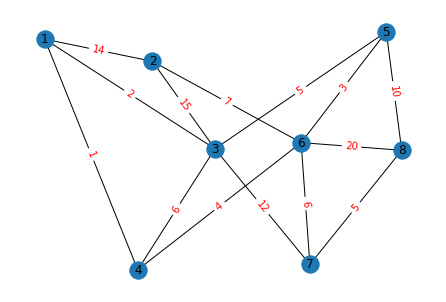

In [9]:
edge_labels = {}
for edge in G.edges:
  edge_labels[edge] = G[edge[0]][edge[1]]['weight']

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [10]:
#start node
start = list(G.nodes)[0]

reachables = pathfinding(G, start)
print(f'Set of reachable nodes from node {start}:\n{reachables}')

Set of reachable nodes from node 1:
{1, 2, 3, 4, 5, 6, 7, 8}
